In [1]:
%matplotlib inline
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [15]:
data = pd.read_csv('loan/loan.csv', low_memory=False)
data.head()
data.drop(['id', 'member_id', 'emp_title'], axis=1, inplace=True)

data.replace('n/a', np.nan,inplace=True)
data.emp_length.fillna(value=0,inplace=True)
data['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data['emp_length'] = data['emp_length'].astype(int)

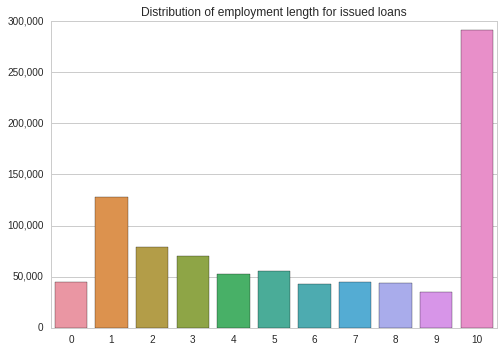

In [22]:
import seaborn as sns
import matplotlib 

s = pd.value_counts(data['emp_length']).to_frame().reset_index()
s.columns = ['type', 'count']

def emp_dur_graph(graph_title):

    sns.set_style("whitegrid")
    ax = sns.barplot(y = "count", x = 'type', data=s)
    ax.set(xlabel = '', ylabel = '', title = graph_title)
    ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
emp_dur_graph('Distribution of employment length for issued loans')

In [30]:
import datetime

data.issue_d.fillna(value=np.nan,inplace=True)
issue_d_todate = pd.to_datetime(data.issue_d)
data.issue_d = pd.Series(data.issue_d).str.replace('-2015', '')

data.drop(['loan_status'],1, inplace=True)
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line)
import datetime as dt
#Note: typo in dataset
data.earlilest_cr_line_year = data['earliest_cr_line'].dt.year

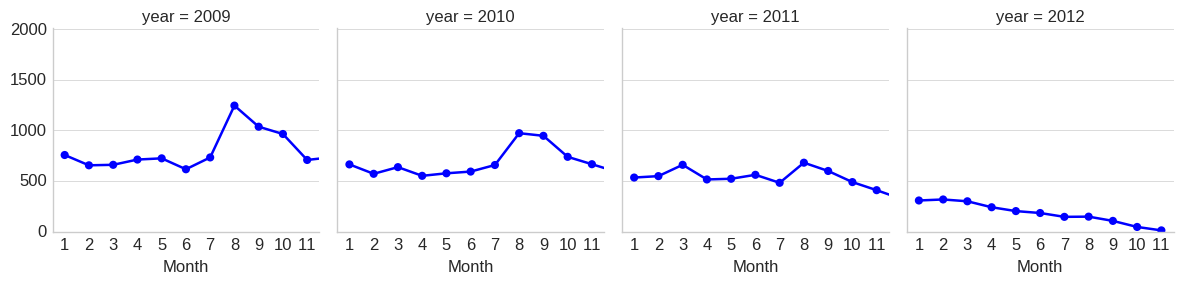

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

s = pd.value_counts(data['earliest_cr_line']).to_frame().reset_index()
s.columns = ['date', 'count']

s['year'] = s['date'].dt.year
s['month'] = s['date'].dt.month

d = s[s['year'] > 2008]

plt.rcParams.update(plt.rcParamsDefault)
sns.set_style("whitegrid")

g = sns.FacetGrid(d, col="year")
g = g.map(sns.pointplot, "month", "count")
g.set(xlabel = 'Month', ylabel = '')
axes = plt.gca()
_ = axes.set_ylim([0, d.year.max()])
plt.tight_layout()

In [73]:
group = data.groupby('grade').agg([np.mean])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
grade,,,,,,,,,,,,,,,,,,,,,
A,14038.860306,14023.323572,14000.506187,7.243312,427.599175,5.786170,86942.651653,15.577401,0.185855,0.403371,...,34628.358165,64.551250,1.027260,2.334143,7072.432659,49.404966,47014.290774,0.633198,1.551417,0.967341
B,13642.965211,13630.195062,13594.642917,10.829618,408.439291,5.783869,75487.389207,17.305115,0.308154,0.550598,...,34514.045767,69.538181,1.243783,2.756522,5936.938825,59.140656,32701.382733,0.778795,1.434935,1.592067
C,14466.306028,14458.230599,14423.251934,13.980098,421.942081,5.781868,71536.950300,18.792559,0.349268,0.742774,...,36624.308557,73.358110,1.474073,3.120244,5664.896613,64.175068,28450.268219,1.029860,1.541821,2.204848
D,15459.506278,15450.499670,15405.780441,17.175814,455.570227,5.742307,69169.272616,19.908175,0.361815,0.905060,...,40460.939104,76.007393,1.655491,3.411563,5300.444749,66.918064,26206.514839,1.189189,1.650359,2.741020
E,17998.146171,17970.831978,17907.977084,19.897322,514.993641,5.832134,72119.152229,20.338847,0.365156,1.005148,...,40619.493075,77.119462,1.808172,3.713989,5188.916205,67.777839,26849.450016,1.380886,1.701524,3.144737
F,19139.160809,19098.808904,19005.420917,23.582787,565.654337,5.908097,73801.170917,19.834316,0.370607,1.221861,...,42421.002336,79.773804,2.093458,4.056075,4926.726636,70.020561,25489.949626,1.595794,1.630841,3.696262
G,20538.563491,20497.959555,20296.247792,25.626706,627.054815,5.865185,79904.591762,19.182093,0.424303,1.516305,...,39297.363636,86.357831,2.272727,4.181818,3825.352273,70.452273,25553.756678,1.761364,1.284091,4.204545


0    1985.0
1    1999.0
2    2001.0
3    1996.0
4    1996.0
Name: earliest_cr_line, dtype: float64